###  <mark>THIS IS            :</mark>

# <font color=navy><div class="alert alert-info">**A Knn Classifier to predict the likelihood of a crime occuring in a Location**<div></font>

<mark>*Making necessary imports & installations*</mark>

In [2]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
!pip install yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [3]:
'''This code is reading in multiple CSV files from a directory and concatenating them into a single dataframe. 

The code creates an empty list called dfs to store the dataframes for each monthly dataset. Then, 
it loops through each folder in the specified directory and checks if the folder name is in the correct format. 
If the folder is in the correct format and contains the file "2022-01-merseyside-street.csv", 
it reads in the CSV file using pandas' read_csv function and adds the year and month as new columns to the dataframe. 
The resulting dataframe is then appended to the dfs list.

After looping through all the folders, the code checks if there are any dataframes in the dfs list. If there are, it 
concatenates all of them into a single dataframe using pandas' concat function'''


import os
import pandas as pd

# Set the directory path to the parent folder containing monthly folders
directory = 'C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_CRIME'

dfs = []

for folder in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, folder)):
        if len(folder) == 7 and '-' in folder:
            year, month = folder.split('-')
            file_path = os.path.join(directory, folder, f'{folder}-merseyside-street.csv')
            if os.path.exists(file_path):
                print(f'Reading in file: {file_path}')
                df = pd.read_csv(file_path)
                df['Year'] = year
                df['Month'] = month
                dfs.append(df)
            else:
                print(f'File not found: {file_path}')
                
# Concatenate all monthly datasets into a single dataframe
if len(dfs) > 0:
    df = pd.concat(dfs, ignore_index=True)
    print('Dataframes concatenated successfully!')
else:
    print('No dataframes to concatenate!')


Reading in file: C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_CRIME\2021-01\2021-01-merseyside-street.csv
Reading in file: C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_CRIME\2021-02\2021-02-merseyside-street.csv
Reading in file: C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_CRIME\2021-03\2021-03-merseyside-street.csv
Reading in file: C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_CRIME\2021-04\2021-04-merseyside-street.csv
Reading in file: C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_CRIME\2021-08\2021-08-merseyside-street.csv
Reading in file: C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_CRIME\2021-09\2021-09-merseyside-street.csv
Reading in file: C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_CRIME\2022-09\2022-09-merseyside-street.csv
Reading in file: C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_CRIME\2022-10\2022-10-merseyside-street.csv
Reading in file: C:/Users/Chhavi/Desktop/DATA_MINING_HW/MERSEYSIDE_ONLY_

In [4]:
print(df.head())


                                            Crime ID Month        Reported by  \
0                                                NaN    01  Merseyside Police   
1                                                NaN    01  Merseyside Police   
2                                                NaN    01  Merseyside Police   
3                                                NaN    01  Merseyside Police   
4  f39c8a05edb476a1405a853a2b5a33be1ae3827acd7cbb...    01  Merseyside Police   

        Falls within  Longitude   Latitude                      Location  \
0  Merseyside Police  -3.069158  53.314304  On or near Chester High Road   
1  Merseyside Police  -2.869972  53.488240          On or near Roman Way   
2  Merseyside Police  -2.869654  53.486687       On or near Birbeck Road   
3  Merseyside Police  -2.846193  53.489210       On or near Moss End Way   
4  Merseyside Police  -2.869972  53.488240          On or near Roman Way   

   LSOA code                       LSOA name            

In [5]:
df.to_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/merged_crime_data.csv', index=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176191 entries, 0 to 176190
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               152042 non-null  object 
 1   Month                  176191 non-null  object 
 2   Reported by            176191 non-null  object 
 3   Falls within           176191 non-null  object 
 4   Longitude              176191 non-null  float64
 5   Latitude               176191 non-null  float64
 6   Location               176191 non-null  object 
 7   LSOA code              176191 non-null  object 
 8   LSOA name              176191 non-null  object 
 9   Crime type             176191 non-null  object 
 10  Last outcome category  152042 non-null  object 
 11  Context                52737 non-null   object 
 12  Year                   176191 non-null  object 
dtypes: float64(2), object(11)
memory usage: 17.5+ MB


In [8]:
import pandas as pd

# Load the merged_crime_data dataset
merged_crime_data = pd.read_csv('C:/New Volume D/DATA MINING/merged_crime_data.csv')

# Drop rows where Crime ID is null
merged_crime_data = merged_crime_data.dropna(subset=['Crime ID'])

# Save the new dataset to a CSV file
merged_crime_data.to_csv('new_merged_crime_data.csv', index=False)


'''This code loads a CSV file named "merged_crime_data.csv" 
Then, it drops any rows from the dataframe where the value in the "Crime ID" column is null.
The resulting dataframe is still assigned to the variable merged_crime_data.
Finally, the code saves the resulting dataframe as a new CSV file named "new_merged_crime_data.csv" '''

'This code loads a CSV file named "merged_crime_data.csv" \nThen, it drops any rows from the dataframe where the value in the "Crime ID" column is null.\nThe resulting dataframe is still assigned to the variable merged_crime_data.\nFinally, the code saves the resulting dataframe as a new CSV file named "new_merged_crime_data.csv" '

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52737 entries, 4 to 176190
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               52737 non-null  object 
 1   Month                  52737 non-null  object 
 2   Reported by            52737 non-null  object 
 3   Falls within           52737 non-null  object 
 4   Longitude              52737 non-null  float64
 5   Latitude               52737 non-null  float64
 6   Location               52737 non-null  object 
 7   LSOA code              52737 non-null  object 
 8   LSOA name              52737 non-null  object 
 9   Crime type             52737 non-null  object 
 10  Last outcome category  52737 non-null  object 
 11  Context                52737 non-null  object 
 12  Year                   52737 non-null  object 
dtypes: float64(2), object(11)
memory usage: 5.6+ MB


In [11]:
'''This code reads in a CSV file named "new_merged_crime_data.csv" from the directory 
The shape attribute of the dataframe df is then used to get the number of rows and columns 
in the dataframe. Specifically, df.shape[0] returns the number of rows in the dataframe. 
'''

import pandas as pd

# read in your data as a pandas dataframe
df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

# count the total number of rows
num_rows = df.shape[0]

print(f'The dataframe has {num_rows} rows.')


The dataframe has 350869 rows.


In [12]:
'''This code reads in a CSV file named "new_merged_crime_data.csv" from the directory 

Next, the code checks if there are at least 100 rows in the dataframe. If so, it drops any rows 
with missing values using the dropna() method, and then randomly samples 100 rows from the
remaining dataframe using the sample() method with the n parameter set to 100.

If there are fewer than 100 rows in the dataframe, the code prints a message that says 
"Not enough rows to sample from."'''


import pandas as pd

# read in your data as a pandas dataframe
df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

# print the dataframe to check if it's empty
print(df)

# count the total number of rows
num_rows = df.shape[0]

print(f'The dataframe has {num_rows} rows.')

# check if there are enough rows to sample
if len(df) >= 100:
    df = df.dropna().sample(n=100)
else:
    print("Not enough rows to sample from.")


                                                 Crime ID  Month  \
0       f39c8a05edb476a1405a853a2b5a33be1ae3827acd7cbb...    1.0   
1       d4644bb1cdbe354c3ee37a22a6fd935f0d3a266494185a...    1.0   
2       39057d83578931f2ef0e451826c15aa3f2f41fb90405af...    1.0   
3       5e03e509a7ed3afa12400bb89ce382063ba507e42d09a8...    1.0   
4       75acd2ed88d357c5e37d33492194db5cb446ed5c2abc9e...    1.0   
...                                                   ...    ...   
350864  7dbb153b73da0d9540f1f5ed1c18b6989b48a3df361913...    2.0   
350865  bdf6c24f9b596a0c97f1ae76527da6b4df562e8b4f565c...    2.0   
350866  e01a05795b5a8d7e0312dd73bb1ae126c0ba82c2453799...    2.0   
350867  080843b63c51635c859b87340b5cb5c0a3312f027daa51...    2.0   
350868  4a56e23d30aea239e5256e44dfce7b18f3abccb585d331...    2.0   

              Reported by       Falls within  Longitude   Latitude  \
0       Merseyside Police  Merseyside Police  -2.869972  53.488240   
1       Merseyside Police  Merseyside Polic

ValueError: Cannot take a larger sample than population when 'replace=False'

In [15]:
'''This code uses the NumPy library to generate a population of integers from 1 to 10 and 
take a random sample of 5 integers from the population.

The code uses NumPy's random.choice function to take a random sample of 5 integers 
from the population array. 

Finally, the code prints out the original population array and the resulting sample array'''


import numpy as np

# Create a population of integers from 1 to 10
population = np.arange(1, 11)

# Take a random sample of 5 integers from the population
sample = np.random.choice(a=population, size=5, replace=False)

print("Population:", population)
print("Sample:", sample)

Population: [ 1  2  3  4  5  6  7  8  9 10]
Sample: [4 6 8 5 1]


In [16]:
'''This code uses the pandas library to sample 100,000 rows from a pandas DataFrame object df without replacement.

if statement checks whether num_rows is greater than or equal to 100,000. If it is, the 
sample method is called on the df DataFrame with the arguments n=100000 and replace=False to 
create a new DataFrame object sample_df containing a random sample of 100,000 rows from df. 
If num_rows is less than 100,000, the sample method is called with n=num_rows instead to create 
a new DataFrame object sample_df containing all rows from df.

Finally, the code uses the head method on sample_df to print the first few rows of the sampled DataFrame to the console.'''


import pandas as pd

num_rows = df.shape[0]

if num_rows >= 100000:
    sample_df = df.sample(n=100000, replace=False)
else:
    sample_df = df.sample(n=num_rows, replace=False)

print(sample_df.head())


                                                 Crime ID  Month  \
201365  c73a8a623e0d4416a3e9e274bcd125a8209fbadd40467c...    4.0   
161115  f795ee17b36cf5e3a5869c14e1eb8f472c052b7be2d395...    1.0   
298432  c3ac0355d2fda8da7da4c7ca350ae0b592b217c1136b7a...   11.0   
9232    4ade19f8907678bf381dcd97e61c092fe4e358df6f902c...    1.0   
253325  5e6d5dbcfad1b2a7898ad89fb09d00153b69c4098f2b81...    7.0   

              Reported by       Falls within  Longitude   Latitude  \
201365  Merseyside Police  Merseyside Police  -2.959660  53.386608   
161115  Merseyside Police  Merseyside Police  -2.992046  53.398847   
298432  Merseyside Police  Merseyside Police  -2.870499  53.436721   
9232    Merseyside Police  Merseyside Police  -3.072291  53.370422   
253325  Merseyside Police  Merseyside Police  -3.025461  53.388056   

                               Location  LSOA code       LSOA name  \
201365  On or near Devonshire Road West  E01006678  Liverpool 044E   
161115          On or near Par

In [17]:
'''The code is using the factorize() function from pandas library to encode two 
categorical columns in the DataFrame df: "Crime type" and "Last outcome category".

By applying factorize() to these columns, the code is converting them from text-based 
categorical values to numerical values, which can be easier to work with in certain situations.'''


df['Crime type'] = pd.factorize(df["Crime type"])[0]
df['Last outcome category'] = pd.factorize(df["Last outcome category"])[0]


### understanding the distribution of crimes across different types in the dataset.

<AxesSubplot:xlabel='Crime type', ylabel='count'>

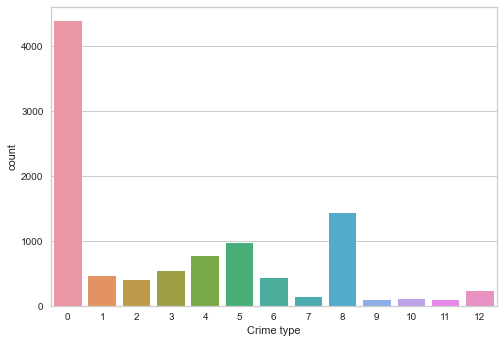

In [19]:
'''This code is using the countplot() function to create a 
bar plot of the counts of each category in the "Crime type" column of df.
By setting x="Crime type" and data=df, the code is creating a bar plot '''

import seaborn as sns

sns.countplot(x="Crime type", data=df)


<AxesSubplot:xlabel='Last outcome category', ylabel='count'>

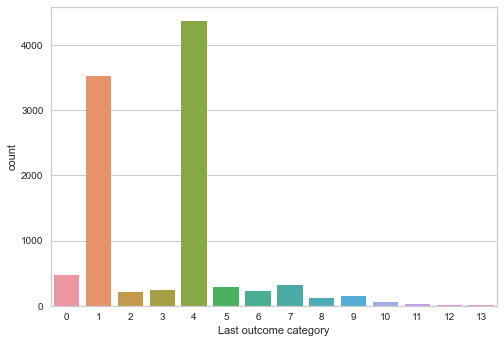

In [20]:
sns.countplot(x="Last outcome category", data=df)


In [21]:
'''These two lines of code print out the unique values of the "Crime type" and 
"Last outcome category" '''

print(df["Crime type"].unique())
print(df["Last outcome category"].unique())


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [22]:
print(df["Crime type"].value_counts())
print(df["Last outcome category"].value_counts())


0     4383
8     1426
5      970
4      768
3      539
1      464
6      425
2      403
12     221
7      135
10     102
9       82
11      82
Name: Crime type, dtype: int64
4     4366
1     3518
0      473
7      325
5      284
3      239
6      233
2      205
9      144
8      114
10      55
11      27
13      13
12       4
Name: Last outcome category, dtype: int64


In [23]:
print(df["Crime type"].isnull().sum())
print(df["Last outcome category"].isnull().sum())

0
0


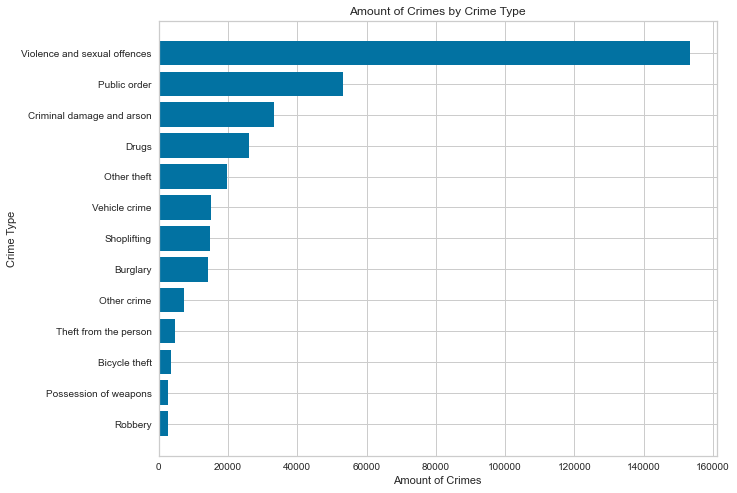

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

crime_counts = df.groupby('Crime type')['Crime ID'].count().sort_values()

plt.figure(figsize=(10, 8))
plt.barh(crime_counts.index, crime_counts.values)
plt.title('Amount of Crimes by Crime Type')
plt.xlabel('Amount of Crimes')
plt.ylabel('Crime Type')
plt.show()


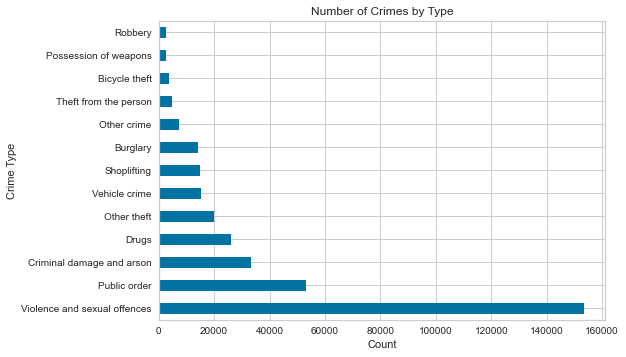

In [20]:
'''This cod produces a horizontal bar plot of the crime types'''


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

crime_counts = df['Crime type'].value_counts()
crime_counts.plot(kind='barh')

plt.title('Number of Crimes by Type')
plt.xlabel('Count')
plt.ylabel('Crime Type')

plt.show()


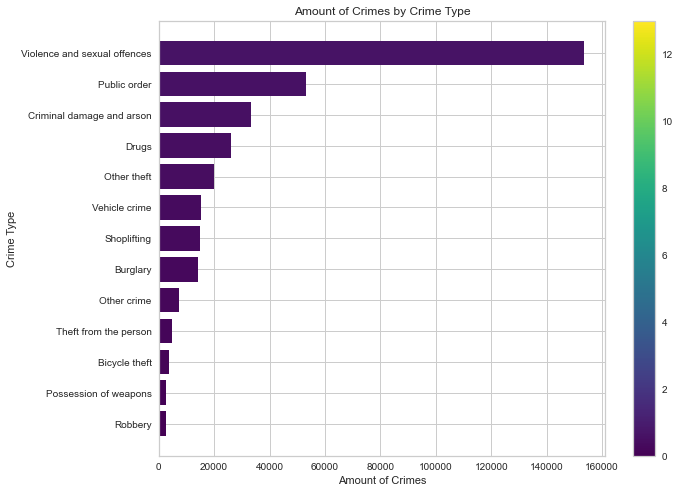

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

crime_counts = df.groupby('Crime type')['Crime ID'].count().sort_values()

cmap = plt.get_cmap('viridis')

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(crime_counts.index, crime_counts.values, color=cmap(np.arange(len(crime_counts))))
ax.set_title('Amount of Crimes by Crime Type')
ax.set_xlabel('Amount of Crimes')
ax.set_ylabel('Crime Type')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(crime_counts)))
sm._A = []
cbar = plt.colorbar(sm)

plt.show()


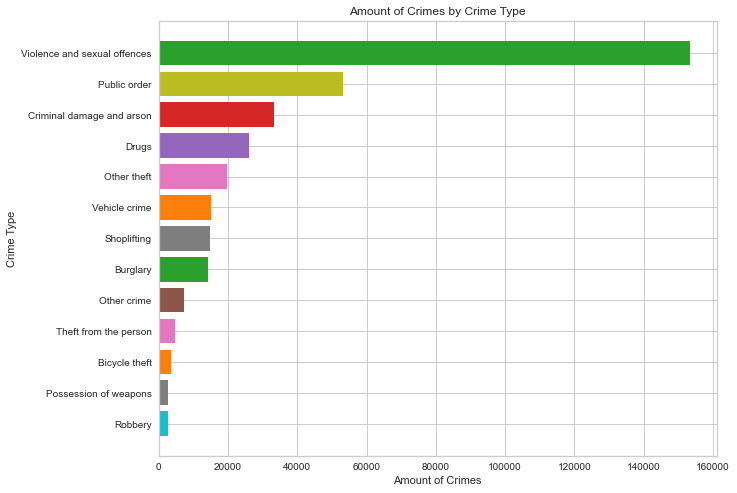

In [28]:
'''defining a dictionary that maps each crime type to a color, groups the DataFrame by crime type and counts the number 
of occurrences of each crime type, and creates a horizontal bar plot with different colors for each crime type'''


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

# Define a dictionary that maps each crime type to a color
color_dict = {
    'Anti-social behaviour': 'tab:blue',
    'Bicycle theft': 'tab:orange',
    'Burglary': 'tab:green',
    'Criminal damage and arson': 'tab:red',
    'Drugs': 'tab:purple',
    'Other crime': 'tab:brown',
    'Other theft': 'tab:pink',
    'Possession of weapons': 'tab:gray',
    'Public order': 'tab:olive',
    'Robbery': 'tab:cyan',
    'Shoplifting': 'tab:gray',
    'Theft from the person': 'tab:pink',
    'Vehicle crime': 'tab:orange',
    'Violence and sexual offences': 'tab:green'
}

# Group the DataFrame by crime type 
crime_counts = df.groupby('Crime type')['Crime ID'].count().sort_values()


colors = [color_dict[c] for c in crime_counts.index]
plt.figure(figsize=(10, 8))
plt.barh(crime_counts.index, crime_counts.values, color=colors)
plt.title('Amount of Crimes by Crime Type')
plt.xlabel('Amount of Crimes')
plt.ylabel('Crime Type')
plt.show()


In [32]:
'''grouping the df DataFrame by the Crime type column and counting the number of occurrences of each crime type using the 
count() method, The resulting crime_counts Series contains the number of occurrences of each crime type in the df DataFrame.'''

crime_counts = df.groupby('Crime type')['Crime ID'].count().sort_values()

In [33]:
'''The values in this column 'New Crime Type'are determined by the values in the 'Crime type' column, where 
if the count of a particular crime type is less than the threshold value of 500, the value 
in the 'New Crime Type' column will be 'Others'. If the count of the crime type is greater 
than or equal to the threshold value, the value in the 'New Crime Type' column will be the 
same as the value in the 'Crime type' column.'''

threshold = 500 # set a threshold value
df['New Crime Type'] = np.where(df['Crime type'].isin(crime_counts[crime_counts<threshold].index), 'Others', df['Crime type'])

In [34]:
'''This new DataFrame can be used to plot 
the counts of the new crime types.'''

new_crime_counts = df.groupby('New Crime Type')['Crime ID'].count().sort_values()

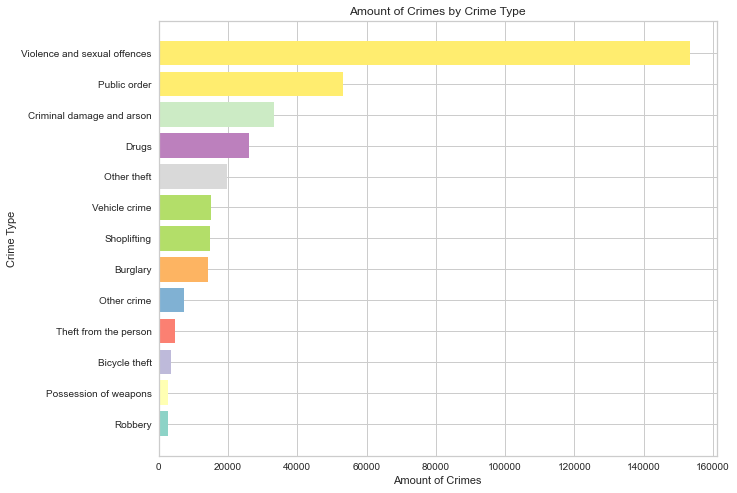

In [35]:
'''plt.cm.Set3 function generates a color map with a range of colors, 
and the np.linspace function is used to evenly divide the range of colors'''


colors = plt.cm.Set3(np.linspace(0, 1, len(new_crime_counts)))
plt.figure(figsize=(10, 8))
plt.barh(new_crime_counts.index, new_crime_counts.values, color=colors)
plt.title('Amount of Crimes by Crime Type')
plt.xlabel('Amount of Crimes')
plt.ylabel('Crime Type')
plt.show()


In [37]:
'''This code:
Sorting the DataFrame in descending order of 'Amt' using all_classes.sort_values(['Amt'], ascending=[False])
Then selecting the last 13 classes using all_classes.tail(13) and assigns them to unwanted_classes variable.'''


# Sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Crime type'])['Crime ID'].size().reset_index()
all_classes['Amt'] = all_classes['Crime ID']
all_classes = all_classes.drop(['Crime ID'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)


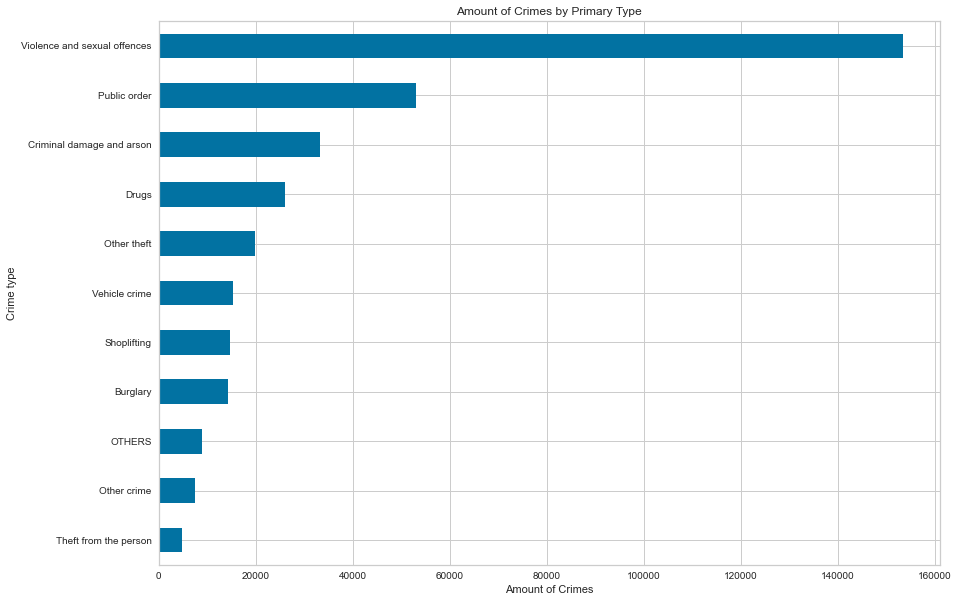

In [38]:

all_classes = df.groupby(['Crime type']).size().reset_index(name='Count')

all_classes = all_classes.sort_values(by='Count', ascending=False)

# Select the unwanted classes to be grouped under label 'OTHERS'
unwanted_classes = all_classes.tail(3)

# Replace unwanted classes with 'OTHERS'
df.loc[df['Crime type'].isin(unwanted_classes['Crime type']), 'Crime type'] = 'OTHERS'

# Plot bar chart to visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
df.groupby(['Crime type']).size().sort_values(ascending=True).plot(kind='barh')
plt.show()


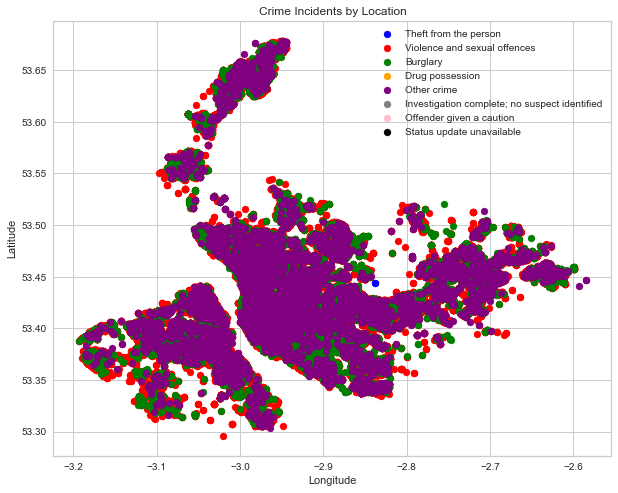

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

color_dict = {
    'Theft from the person': 'blue',
    'Violence and sexual offences': 'red',
    'Burglary': 'green',
    'Drug possession': 'orange',
    'Other crime': 'purple',
    'Investigation complete; no suspect identified': 'gray',
    'Offender given a caution': 'pink',
    'Status update unavailable': 'black'
}

# Create a scatter plot with different crime types or last outcome categories
plt.figure(figsize=(10, 8))
for crime_type, color in color_dict.items():
    df_subset = df[df['Crime type'] == crime_type]
    plt.scatter(df_subset['Longitude'], df_subset['Latitude'], color=color, label=crime_type)
plt.title('Crime Incidents by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


<Figure size 720x576 with 0 Axes>

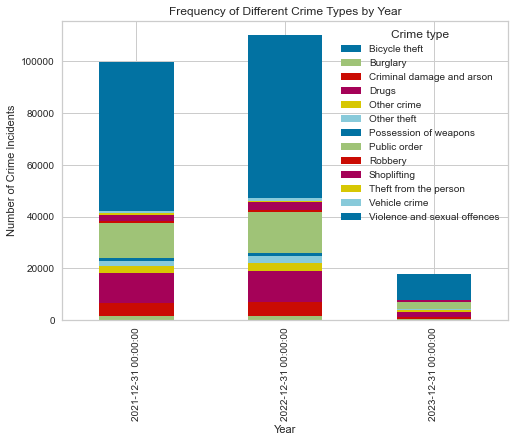

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

# Convert the 'Year' column to a datetime format and set it as the index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Group the DataFrame by year and crime type and count the number of occurrences of each group
grouped = df.groupby([pd.Grouper(freq='Y'), 'Crime type'])['Crime ID'].count().unstack()

plt.figure(figsize=(10, 8))
grouped.plot(kind='bar', stacked=True)
plt.title('Frequency of Different Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.show()


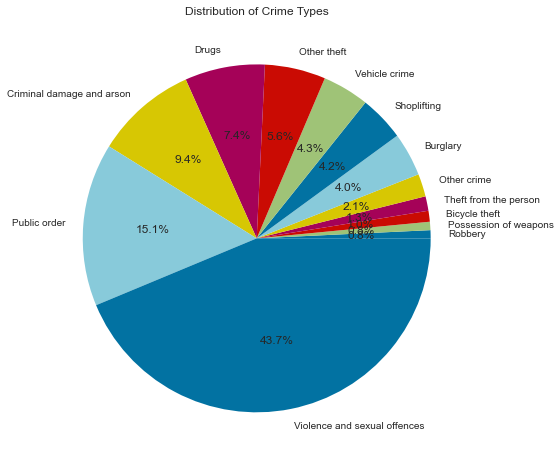

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

crime_counts = df.groupby('Crime type')['Crime ID'].count().sort_values()

plt.figure(figsize=(10, 8))
plt.pie(crime_counts.values, labels=crime_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Crime Types')
plt.show()


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350869 entries, 0 to 350868
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               350869 non-null  object 
 1   Month                  350869 non-null  float64
 2   Reported by            350869 non-null  object 
 3   Falls within           350869 non-null  object 
 4   Longitude              350869 non-null  float64
 5   Latitude               350869 non-null  float64
 6   Location               350869 non-null  object 
 7   LSOA code              350869 non-null  object 
 8   LSOA name              350869 non-null  object 
 9   Crime type             350869 non-null  object 
 10  Last outcome category  350869 non-null  object 
 11  Context                123294 non-null  object 
 12  Year                   227608 non-null  float64
 13  Unnamed: 13            123268 non-null  float64
dtypes: float64(5), object(9)
memory usag

In [44]:
Classes = df['Crime type'].unique()


In [45]:
Classes

array(['Burglary', 'Criminal damage and arson', 'Drugs', 'Other theft',
       'Possession of weapons', 'Public order', 'Vehicle crime',
       'Violence and sexual offences', 'Theft from the person',
       'Shoplifting', 'Other crime', 'Robbery', 'Bicycle theft'],
      dtype=object)

In [46]:
df['Crime Type'] = pd.factorize(df["Crime type"])[0] 
df['Crime Type'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

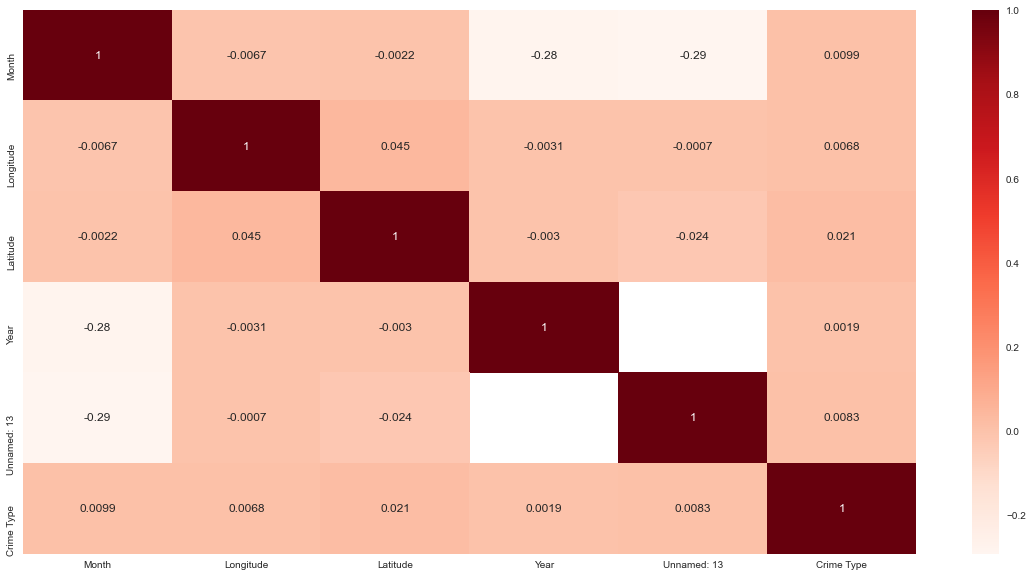

In [47]:
'''Heatmap is a graphical representation of data in a matrix this allows easy visualization of patterns and trends 
in the data. We can find out any correlations between features in a dataset, and to identify which features are most 
important for predicting a particular target variable.'''


X_fs = df.drop(['Crime type'], axis=1)
Y_fs = df['Crime type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [48]:
'''This code is performing feature selection based on correlation with the target variable "Crime Type".
This helps in identifying features that have a strong linear correlation with the 
target variable "Crime Type" using a correlation threshold of 0.2

First, it calculates the absolute correlation coefficient between each feature and the target 
variable using the abs() function.

Next, it selects the highly correlated features by filtering the cor_target variable based on 
a threshold of 0.2 using the Boolean indexing operation cor_target > 0.2. The resulting Boolean 
mask is then applied to cor_target, which returns only the highly correlated features. '''


# Correlation with output variable
cor_target = abs(cor['Crime Type'])
# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.2]
relevant_features


Crime Type    1.0
Name: Crime Type, dtype: float64

In [49]:
Features = ["Year", "Crime type", "Location"]
print('Updated Features: ', Features)

Updated Features:  ['Year', 'Crime type', 'Location']


### Splitting the data into training and test sets using the train_test_split function from sklearn.model_selection. 

In [50]:
'''The training set size is set to 80% (train_size=0.8) 
and the test set size is set to 20% (test_size=0.2)
the size of the training set (x_train.shape), and the size of the test set (x_test.shape)
selecting a subset of features and the target variable from the DataFrame, 
splitting the data into training and test sets, and printing out some information about the data. 
The resulting feature set and target variable can be used for building a predictive model for crime type classification.'''

x = df[['Year', 'Crime type', 'Location']]
y = df['Crime Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=3)

print('Feature Set Used : ', x.columns.tolist())
print('Target Class : ', 'Crime Type')
print('Training Set Size : ', x_train.shape)
print('Test Set Size : ', x_test.shape)

Feature Set Used :  ['Year', 'Crime type', 'Location']
Target Class :  Crime Type
Training Set Size :  (280695, 3)
Test Set Size :  (70174, 3)


In [51]:
print(df.dtypes)


Crime ID                  object
Month                    float64
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                   object
Year                     float64
Unnamed: 13              float64
Crime Type                 int64
dtype: object


In [44]:
#Unable to allocate 36.5 GiB for an array with shape (13965, 350869) and data type float64

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

# Load your dataset into a pandas DataFrame
df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

# One-hot encode categorical variables
ohe = OneHotEncoder()
X_cat = ohe.fit_transform(df[['Crime type', 'Location']]).toarray()
X_num = df[['Longitude', 'Latitude']].values
X = pd.concat([pd.DataFrame(X_cat), pd.DataFrame(X_num)], axis=1)
y = df['Crime type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


MemoryError: Unable to allocate 36.5 GiB for an array with shape (13965, 350869) and data type float64

In [58]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

# Group the data by 'Crime type'
df_crimeName = df[df['Crime type'] == 'Criminal damage and arson']
#df_crimeName = df[df['Crime type'] == 'Criminal damage and arson'].copy()


# Label encode the 'Location' column
le = LabelEncoder()
df_crimeName['Location'] = le.fit_transform(df_crimeName['Location'])

# Selecting relevant features for prediction
X = df_crimeName[['Location', 'Longitude', 'Latitude']]
y = df_crimeName['Crime type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluating the accuracy of the classifier
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


<ipython-input-58-e333e17d8668>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crimeName['Location'] = le.fit_transform(df_crimeName['Location'])


Accuracy: 1.00


### Internet says that if the model's performance drops significantly on the test set compared to the training set, then it may be overfitting.
- Therefore we can try using a different evaluation metric to cross-validate the model. For example, precision, recall, 
- or F1 score instead of accuracy. This may reveal that the model is not actually performing as well as it seems.

In [64]:
'''To evaluate the performance of the KNN classifier on a validation set or perform cross-validation, 
we can use the cross_val_score function from Scikit-Learn's model_selection module. 
This function splits the dataset into k folds and evaluates the model on each fold using the specified scoring metric.
'''
from sklearn.model_selection import cross_val_score

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

df_crimeName = df[df['Crime type'] == 'Criminal damage and arson']
X = df_crimeName[['Location', 'Longitude', 'Latitude']]
y = df_crimeName['Crime type']

# Label encode the 'Location' column
le = LabelEncoder()
X['Location'] = le.fit_transform(X['Location'])

# Train the KNN classifier using the entire dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Evaluate the performance of the KNN classifier using 5-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Average accuracy: {cv_scores.mean():.2f}')


<ipython-input-64-60983fd65367>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le.fit_transform(X['Location'])


Cross-validation scores: [1. 1. 1. 1. 1.]
Average accuracy: 1.00


In [65]:
import pandas as pd

df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

unique_crime_types = df['Crime type'].unique()
print(f'Unique crime types: {unique_crime_types}')

# Check if there is more than one unique value
if len(unique_crime_types) > 1:
    print('Dataset contains more than one class')
else:
    print('Dataset contains only one class')


Unique crime types: ['Burglary' 'Criminal damage and arson' 'Drugs' 'Other theft'
 'Possession of weapons' 'Public order' 'Vehicle crime'
 'Violence and sexual offences' 'Theft from the person' 'Shoplifting'
 'Other crime' 'Robbery' 'Bicycle theft']
Dataset contains more than one class


In [66]:
from sklearn.metrics import f1_score

# Load your dataset into a pandas DataFrame
df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

df_crimeName = df[df['Crime type'] == 'Criminal damage and arson']
X = df_crimeName[['Location', 'Longitude', 'Latitude']]
y = df_crimeName['Crime type']

le = LabelEncoder()
X['Location'] = le.fit_transform(X['Location'])

# Train the KNN classifier using the entire dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Evaluate the performance of the KNN classifier using 5-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='f1_macro')
print(f'Cross-validation F1 scores: {cv_scores}')
print(f'Average F1 score: {cv_scores.mean():.2f}')


<ipython-input-66-2dc927300cc1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le.fit_transform(X['Location'])


Cross-validation F1 scores: [1. 1. 1. 1. 1.]
Average F1 score: 1.00


In [67]:
'''To check for overfitting, you can evaluate the performance of the KNN classifier on both the training set and the test set.
If the accuracy on the test set is significantly lower than the accuracy on the training set, it may indicate overfitting.

To use a different classification algorithm, you can replace the KNN classifier with a different classifier from scikit-learn.
For example, you could try using  random forests.'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset into a pandas DataFrame
df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

# Group the data by 'Crime type'
df_crimeName = df[df['Crime type'] == 'Criminal damage and arson']

# Label encode the 'Location' column
le = LabelEncoder()
df_crimeName['Location'] = le.fit_transform(df_crimeName['Location'])

# Select relevant features for prediction
X = df_crimeName[['Location', 'Longitude', 'Latitude']]
y = df_crimeName['Crime type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the classifier on the training set
train_accuracy = rfc.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Evaluate the accuracy of the classifier on the testing set
test_accuracy = rfc.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


<ipython-input-67-596c3971eed1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crimeName['Location'] = le.fit_transform(df_crimeName['Location'])


Training Accuracy: 1.00
Test Accuracy: 1.00


In [68]:
'''decision - trees'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset into a pandas DataFrame
df = pd.read_csv('C:/Users/Chhavi/Desktop/DATA_MINING_HW/new_merged_crime_data.csv')

# Group the data by 'Crime type'
df_crimeName = df[df['Crime type'] == 'Criminal damage and arson']

# Label encode the 'Location' column
le = LabelEncoder()
df_crimeName['Location'] = le.fit_transform(df_crimeName['Location'])

# Select relevant features for prediction
X = df_crimeName[['Location', 'Longitude', 'Latitude']]
y = df_crimeName['Crime type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtc.predict(X_test)

# Evaluate the accuracy of the classifier on the training set
train_accuracy = dtc.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Evaluate the accuracy of the classifier on the testing set
test_accuracy = dtc.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


Training Accuracy: 1.00
Test Accuracy: 1.00


<ipython-input-68-feccbe1f013b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crimeName['Location'] = le.fit_transform(df_crimeName['Location'])
